# Data quality analysis

In [15]:
# This analyzes the used_cars.csv dataset by summarizing key statistics for each column.
# It calculates:Total number of rows, number of non-null and null values, count of zero values (for numeric columns),data type of each column
import pandas as pd
data = pd.read_csv("new_cars.csv") #read datast
summary = []
for column in data.columns:
    total_rows = data.shape[0]
    non_null_values = data[column].notnull().sum()
    zero_values = (data[column] == 0).sum() if pd.api.types.is_numeric_dtype(data[column]) else "N/A"  # "N/A if rows aren't numeric"
    null_values = data[column].isnull().sum()
    data_type = data[column].dtype
    summary.append({
        "Column Name": column,
        "Total Rows": total_rows,
        "Rows filled with 0": zero_values,
        "Null Rows": null_values,
        "Data Type": data_type
    })
summary_df = pd.DataFrame(summary)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(summary_df)

,Column Name,Total Rows,Rows filled with 0,Null Rows,Data Type
0,id,3147019,N/A,0,object
1,vin,3147019,N/A,0,object
2,price,3147019,92851,0,int64
3,msrp,3147019,91849,0,int64
4,miles,3147019,1131647,0,int64
5,neo_year,3147019,0,0,int64
6,neo_make,3147019,N/A,0,object
7,neo_model,3147019,N/A,3108,object
8,neo_engine_size,3147019,0,189602,float64
9,dealer_id,3147019,0,0,int64


In [2]:
data.head(5)

,id,vin,price,msrp,miles,neo_year,neo_make,neo_model,neo_engine_size,dealer_id,state,carfax_1_owner,carfax_clean_title,dos_active
0,8e06f551-0a5d,1C6SRFHP8SN605299,76302,89180,0,2025,RAM,Ram 1500 Pickup,3.0,1000700,VA,False,False,111.0
1,7bedc5aa-d3b3,JTDACACUXR3039674,37659,37659,10,2024,Toyota,Prius Prime,NaN,1028355,FL,NaN,NaN,14.0
2,0a8f8a28-4e8e,5TDACAB55RS18E831,0,0,0,2024,Toyota,Grand Highlander,2.5,1016306,OR,False,False,52.0
3,82b82369-d2b5,1C4RDJFG2SC509742,47640,47640,38,2025,Dodge,Durango,NaN,1013722,MO,False,False,39.0
4,e42cdde4-1126,1C4SDJFT0RC138850,48285,48285,0,2024,Dodge,Durango,NaN,11027454,NM,False,False,311.0


Correlation of numerical values


,price,msrp,miles,neo_year,neo_engine_size,dealer_id,dos_active
price,1.000000,0.978164,-0.005505,-0.063730,0.487478,-0.010335,0.053520
msrp,0.978164,1.000000,-0.003092,-0.086669,0.504652,-0.011903,0.078210
miles,-0.005505,-0.003092,1.000000,-0.073054,-0.001494,0.001196,0.027988
neo_year,-0.063730,-0.086669,-0.073054,1.000000,-0.181405,-0.102090,-0.620883
neo_engine_size,0.487478,0.504652,-0.001494,-0.181405,1.000000,0.023847,0.106695
dealer_id,-0.010335,-0.011903,0.001196,-0.102090,0.023847,1.000000,0.068125
dos_active,0.053520,0.078210,0.027988,-0.620883,0.106695,0.068125,1.000000


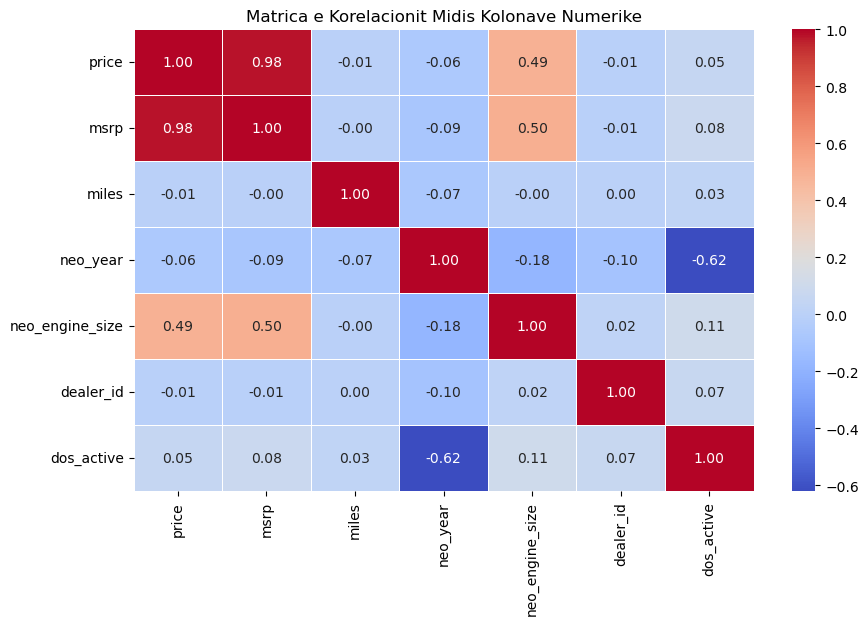

In [16]:
#This script calculates and visualizes the correlation matrix of numerical columns in a dataset.
#The correlation matrix shows how numerical values are related to each other.
#The heatmap uses colors to show these relationships, red means strong positive, blue means strong negative
#and lighter colors mean weak or no relationship.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
numeric_data = data.select_dtypes(include=[np.number]) #filter only numeric values
correlation_matrix = numeric_data.corr() #calculate correlation matrix
print("Correlation of numerical values")
display(correlation_matrix)
#heatmap visualiztion
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrica e Korelacionit Midis Kolonave Numerike")
plt.show()

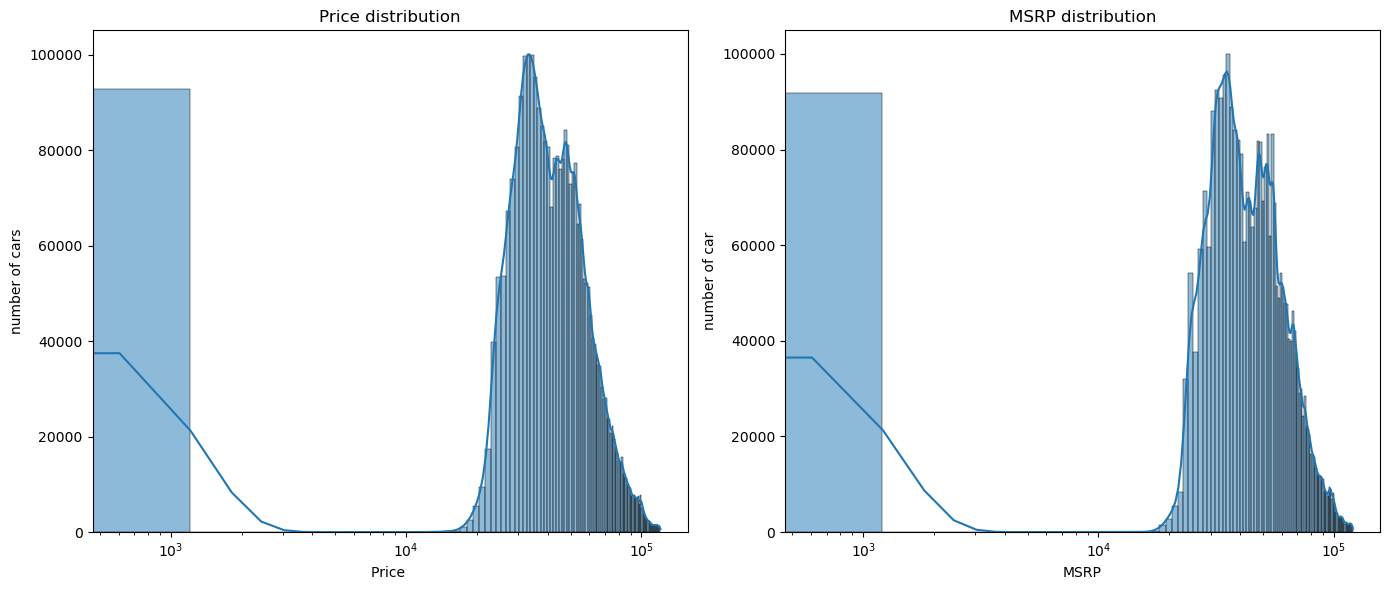

In [17]:
#Visualizes Price and MSRP distributions. It uses logarithmic scaling in histograms for better clarity and comparison.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
file_path = "new_cars.csv"
data = pd.read_csv(file_path)
data.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
#filter necessary columns
price_column = "price"
msrp_column = "msrp"
low_price, high_price = data[price_column].quantile([0.01, 0.99])
low_msrp, high_msrp = data[msrp_column].quantile([0.01, 0.99])
filtered_data = data[(data[price_column] >= low_price) & (data[price_column] <= high_price)]
filtered_data = filtered_data[(filtered_data[msrp_column] >= low_msrp) & (filtered_data[msrp_column] <= high_msrp)]
plt.figure(figsize=(14, 6))
# Histogram for price
plt.subplot(1, 2, 1)
sns.histplot(filtered_data[price_column].dropna(), bins=100, kde=True)
plt.xscale("log")  #use the logarithmic scale to clarify the distribution.
plt.title("Price distribution")
plt.xlabel("Price ")
plt.ylabel("number of cars")
# Histogram for msrp
plt.subplot(1, 2, 2)
sns.histplot(filtered_data[msrp_column].dropna(), bins=100, kde=True)
plt.xscale("log") #Logarithmic scale
plt.title("MSRP distribution")
plt.xlabel("MSRP")
plt.ylabel("number of car")
plt.tight_layout()
plt.show()

In [18]:
#  displays statistics for the price, msrp, and miles columns
stats = data[['price', 'msrp', 'miles']].describe().applymap(lambda x: f"{x:,.0f}")
print(stats)

           price       msrp      miles
count  3,147,019  3,147,019  3,147,019
mean      48,258     50,097        108
std       23,586     23,758      3,001
min            0          0          0
25%       33,721     34,948          0
50%       44,999     47,300          4
75%       58,355     61,345         10
max    1,250,202  1,000,000  2,188,675


In [19]:
#unique values
for col in ['id','vin', 'neo_year', 'neo_make', 'neo_model', 'state', 'dos_active']:
    print(f"{col}: {data[col].nunique()} vlera unike")

id: 3147019 vlera unike
vin: 3147019 vlera unike
neo_year: 30 vlera unike
neo_make: 52 vlera unike
neo_model: 653 vlera unike
state: 57 vlera unike
dos_active: 1655 vlera unike


In [20]:
#check for duplicate values
duplicates = data.duplicated().sum()
print(f"Duplicates: {duplicates}")
#check if price <= msrp
invalid_prices = data[data['price'] > data['msrp']]
print(f"Rows with price > msrp: {len(invalid_prices)}")

Duplicates: 0
Rows with price > msrp: 110586


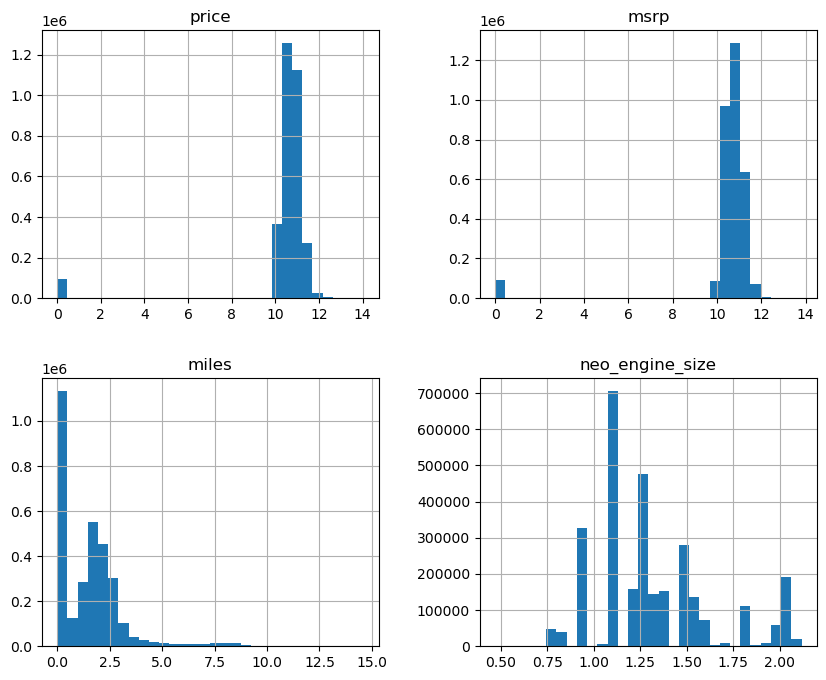

In [21]:
import numpy as np
# Histograma me shkallë logaritmike
data[['price', 'msrp', 'miles','neo_engine_size']].apply(np.log1p).hist(bins=30, figsize=(10, 8))
plt.show()
#Most cars have average prices and mileage, but there are some cases with very high or very low values.

# ML Model K_Means

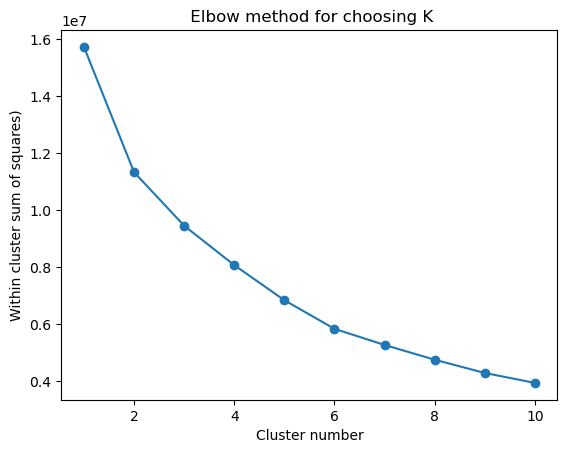

deal_category
Fair Deal     1342206
No Rating     1124555
Uncertain      448674
Good Deal      231550
Great Deal         32
Name: count, dtype: int64


In [4]:
#The script applies K-Means clustering to categorize used cars based on feature like price, mileage, engine size
#and price related metrics. 
#Determines optimal cluster count using the elbow method and assigns each car to a category such fair deal, great deal etc. 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
file_path = 'new_cars.csv'
df = pd.read_csv(file_path)

df.fillna({
    'price': 0,
    'msrp': 0,
    'miles': df['miles'].median(),
    'neo_engine_size': df['neo_engine_size'].median()
}, inplace=True)
# main columns for clustering
features = ['price', 'msrp', 'miles', 'neo_engine_size','dos_active']#, 'mean_price', 'median_price', 'std_price',
            #'price_to_engine_size', 'price_depreciation_per_mile', 'rank_price', 'price_difference_from_state',
            #'min_price_in_group', 'max_price_in_group', 'dos_active']
#Independent copy of X
X = df[features].copy()
X.loc[:, :] = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna().copy()
df_filtered = df.loc[X.index].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
# visualization part
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Cluster number')
plt.ylabel('Within cluster sum of squares)')
plt.title(' Elbow method for choosing K')
plt.show()
# train model 
optimal_k = 5 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_filtered['deal_category'] = kmeans.fit_predict(X_scaled)
# define category
deal_category_mapping = {
    0: 'No Rating',
    1: 'Fair Deal',
    2: 'Great Deal',
    3: 'Good Deal',
    4: 'Uncertain'
}
df_filtered['deal_category'] = df_filtered['deal_category'].map(deal_category_mapping)
df_filtered['deal_category'] = df_filtered['deal_category'].fillna('No Rating')
df_filtered.to_csv('new_cars_categorized_kmeans_labeled.csv', index=False)
# number of cars for each category
category_counts = df_filtered['deal_category'].value_counts()
print(category_counts)

#  Decision Tree Algorithm_Predict

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load dataset
file_path = 'new_cars_categorized_kmeans_labeled.csv'
df = pd.read_csv(file_path)

# Fill missing values
df.fillna({
    'price': 0,
    'msrp': 0,
    'miles': df['miles'].median(),
    'neo_engine_size': df['neo_engine_size'].median()
}, inplace=True)

# Define feature columns
features = ['price', 'msrp', 'miles', 'neo_engine_size', 'dos_active']
X = df[features].copy()  # Ensure it's an independent copy
y = df['deal_category']

# Handle infinite and missing values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)

# Ensure `X` and `df` have the same indices
df_filtered = df.loc[df.index.intersection(X.index)].copy()

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.loc[df_filtered.index])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_filtered['deal_category'], test_size=0.2, random_state=42
)

# Check class distribution
print("Class distribution in training data:")
print(pd.Series(y_train).value_counts())

# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of decision tree model/NewCars: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))  # Fix warning

# Save the trained model
joblib.dump(dt_model, 'decision_tree_model.pkl')

# Generate predictions for the entire dataset
df_filtered['deal_category_predicted'] = dt_model.predict(X_scaled)

# Save updated dataset with predictions
df_filtered.to_csv('new_cars_categorized_decision_tree.csv', index=False)

Class distribution in training data:
deal_category
Fair Deal     1073478
No Rating      899569
Uncertain      359037
Good Deal      185500
Great Deal         29
Name: count, dtype: int64
Accuracy of decision tree model/NewCars: 0.96
Classification Report:
              precision    recall  f1-score   support

   Fair Deal       0.99      0.96      0.97    268728
   Good Deal       0.94      0.94      0.94     46050
  Great Deal       1.00      0.00      0.00         3
   No Rating       0.93      0.98      0.96    224986
   Uncertain       0.96      0.95      0.96     89637

    accuracy                           0.96    629404
   macro avg       0.97      0.76      0.76    629404
weighted avg       0.96      0.96      0.96    629404



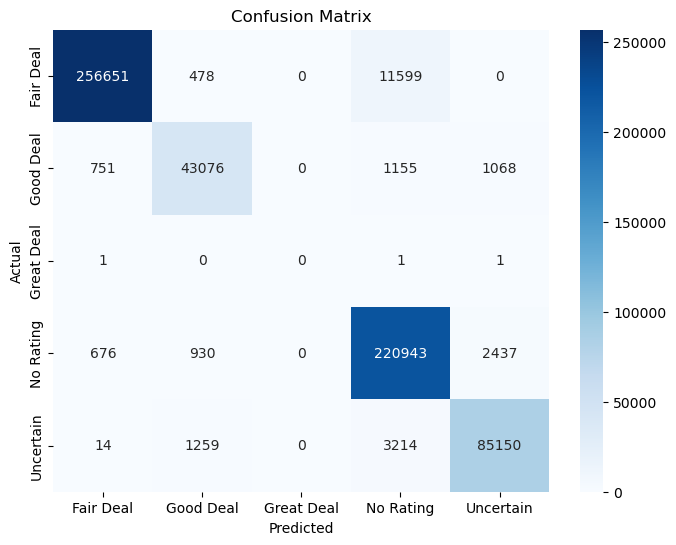

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
